In [21]:
# Problem: https://www.hackerrank.com/challenges/forecasting-passenger-traffic/problem
# Using base R commands
# Copy the data into the clipboard:

# From here:
60
MonthNum_1  1226800
MonthNum_2  926891
MonthNum_3  782725
MonthNum_4  1023038
MonthNum_5  1126293
MonthNum_6  692565
MonthNum_7  1165880
MonthNum_8  1207156
MonthNum_9  1129954
MonthNum_10 745100
MonthNum_11 1059346
MonthNum_12 1168555
MonthNum_13 1317458
MonthNum_14 528045
MonthNum_15 1220238
MonthNum_16 874557
MonthNum_17 1033389
MonthNum_18 1034165
MonthNum_19 812094
MonthNum_20 1351419
MonthNum_21 801822
MonthNum_22 1044266
MonthNum_23 722871
MonthNum_24 742100
MonthNum_25 839471
MonthNum_26 1201199
MonthNum_27 796265
MonthNum_28 953887
MonthNum_29 1124602
MonthNum_30 1070181
MonthNum_31 1160366
MonthNum_32 1131150
MonthNum_33 1151813
MonthNum_34 1065316
MonthNum_35 914800
MonthNum_36 1093034
MonthNum_37 937898
MonthNum_38 991612
MonthNum_39 865649
MonthNum_40 990565
MonthNum_41 965414
MonthNum_42 949248
MonthNum_43 1168905
MonthNum_44 593112
MonthNum_45 1156922
MonthNum_46 870095
MonthNum_47 1023262
MonthNum_48 788327
MonthNum_49 543605
MonthNum_50 510786
MonthNum_51 734714
MonthNum_52 1133025
MonthNum_53 1461091
MonthNum_54 635481
MonthNum_55 1104107
MonthNum_56 844960
MonthNum_57 1271967
MonthNum_58 574319
MonthNum_59 1063900

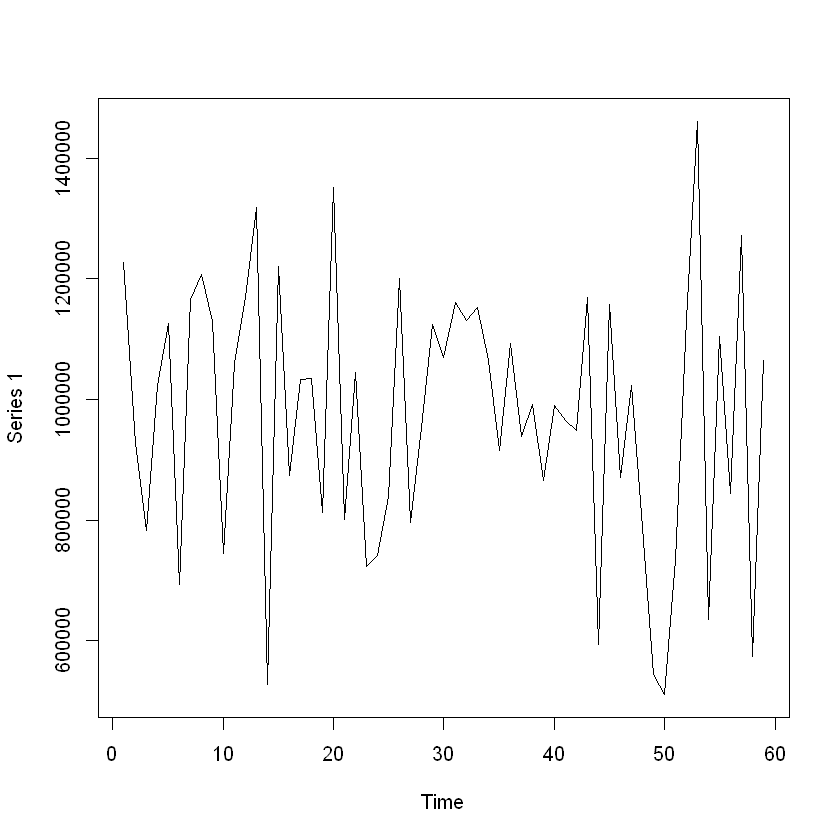

In [22]:
shhh <- suppressPackageStartupMessages
shhh(library(fpp))
################### Run the solution by copying the sample data to the clipboard ###################
data <- read.table(file = "clipboard", strip.white = TRUE, sep='', header = FALSE, skip = 1)

data$V1 <- as.character(data$V1)
data$V2 <- as.numeric(data$V2)
plot(as.ts(as.matrix(data$V2)))
ts_data <- ts(data$V2, frequency = 12, start = c(2000,1), end = c(2004,12)) # we can simply just remove the start and end
# 60 monthly observations 12 * 5years

543605 510786 734714 1133025 1461091 635481 1104107 844960 1271967 574319 1063900 1226800

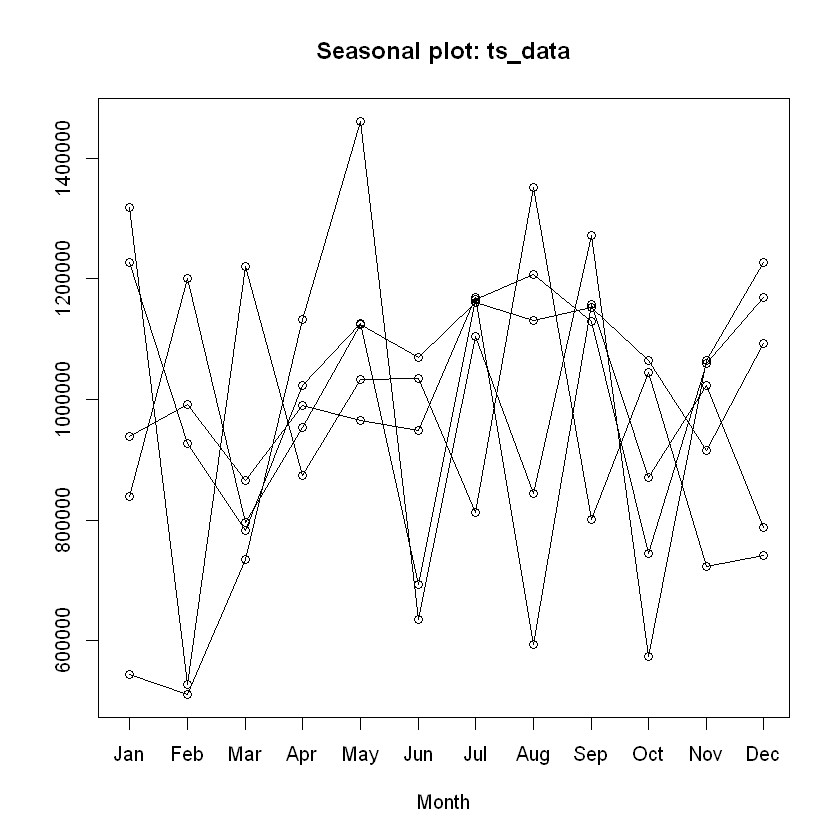

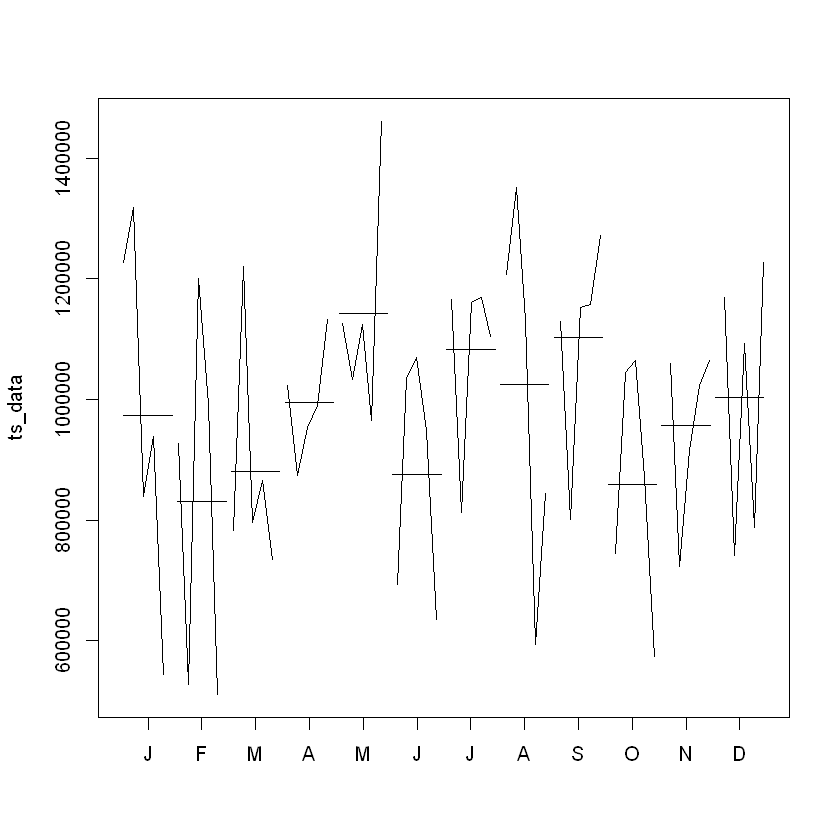

In [23]:
# seasonal naive model
snav <- snaive(ts_data, h = 12)
cat(snav$mean)
seasonplot(ts_data)
monthplot(ts_data)

911033.6 769693.8 817905.4 933001.6 1080145 814315.2 1020258 963546.6 1040483 797806.4 894823 941750.4

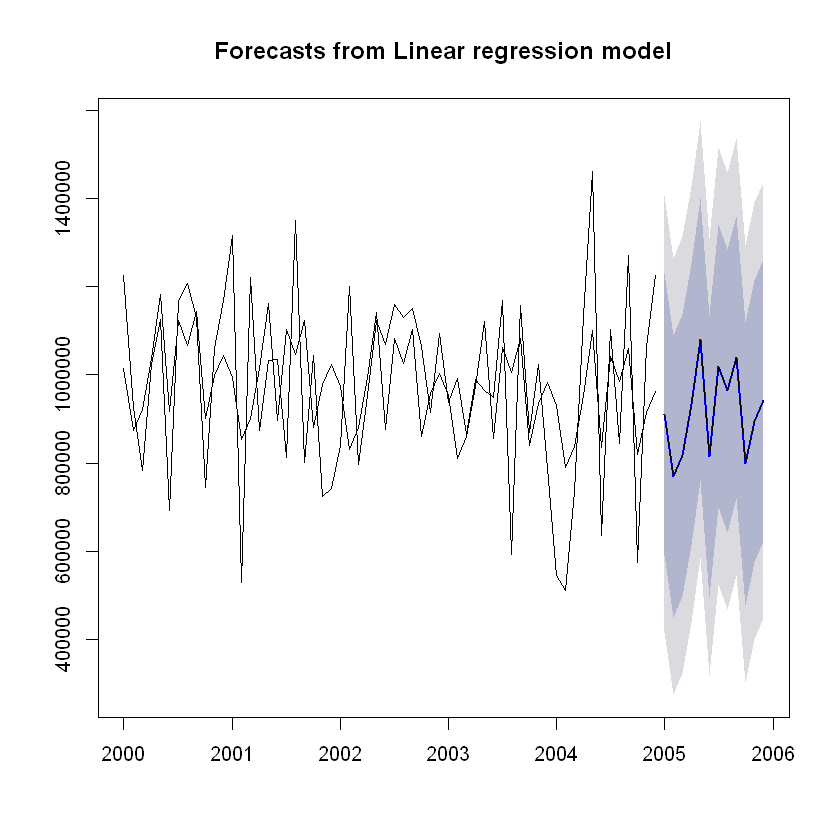

In [24]:
# time series OLS

lm_model <- tslm(ts_data ~ trend + season)
lm_preds <- forecast(lm_model, h = 12)
cat(lm_preds$mean)

plot(lm_preds)
lines(lm_preds$mean)
lines(lm_preds$fitted)

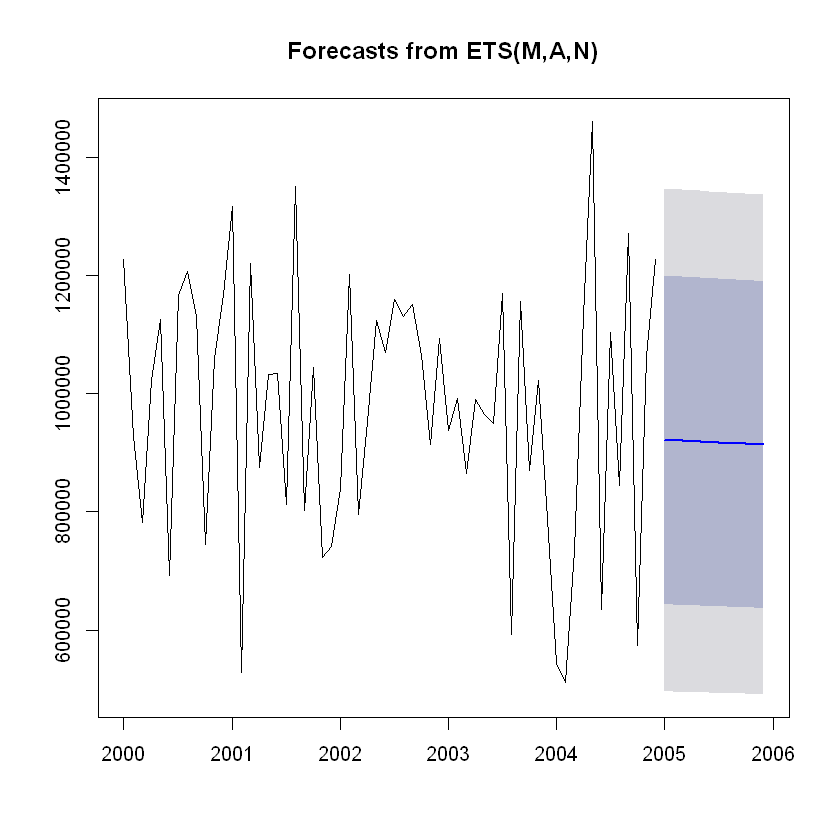

In [25]:
# ets model to find the model with the lowest AIC
# ets with Multiplicative Holt-Winters
ets_model <- ets(ts_data, model = "MAN")
ets_forecast <- forecast(ets_model, h = 12)
plot(ets_forecast)

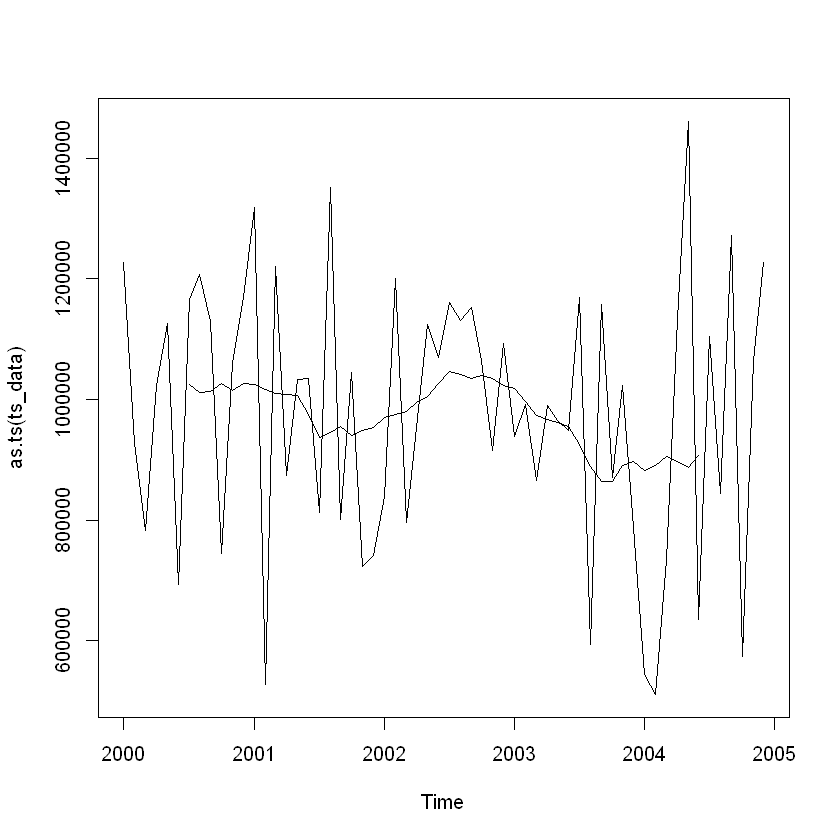

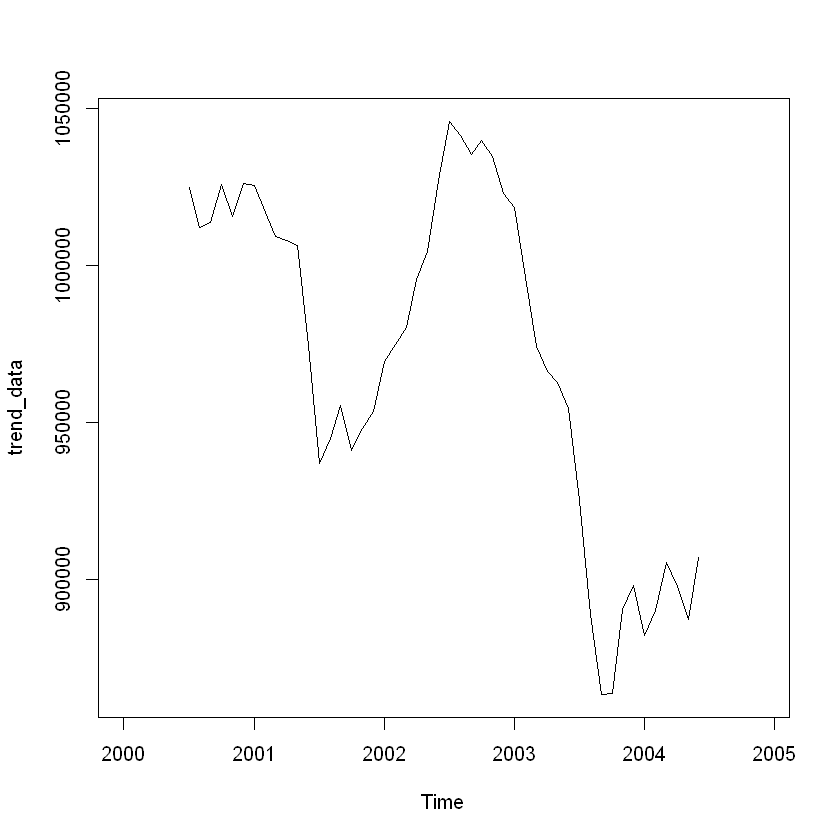

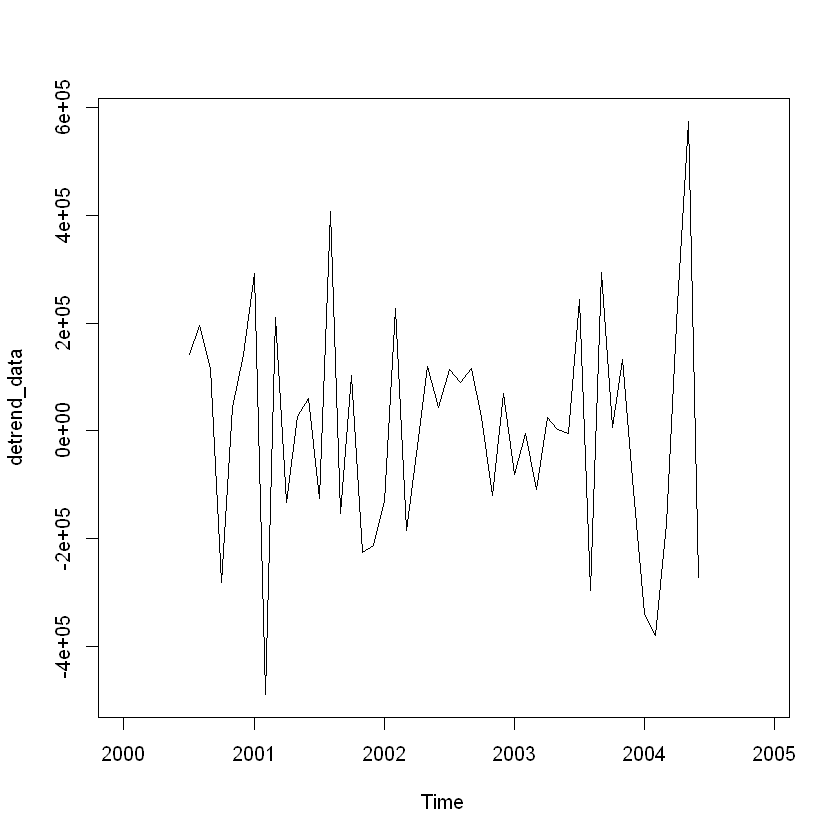

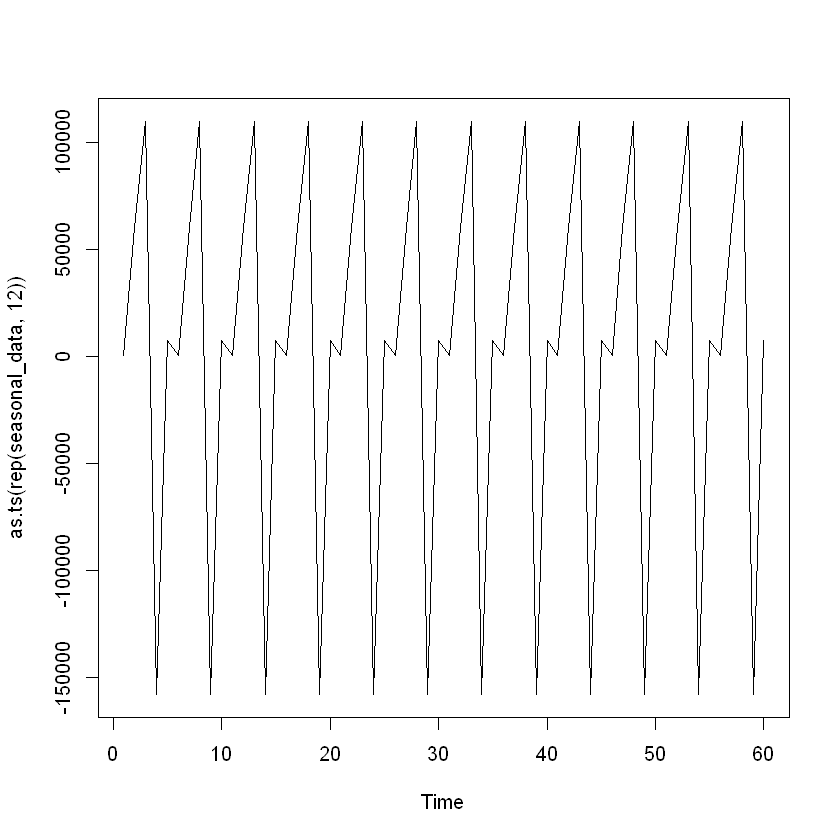

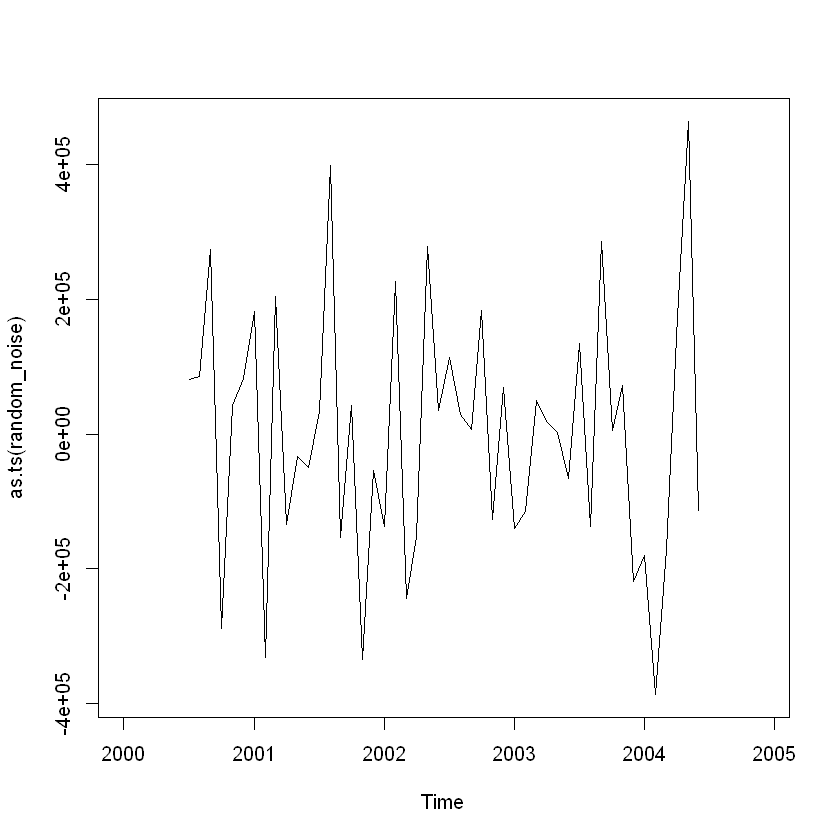

In [26]:
# detrend the data
trend_data <- ma(ts_data, order = 12, centre = T)
plot(as.ts(ts_data))
lines(trend_data)

plot(trend_data) # no trend so we dont "have" to run the detrend below
detrend_data = ts_data - trend_data
plot(detrend_data)

#deseason the data
s_data = t(matrix(data = detrend_data, nrow = 5)) # 5 years of data
seasonal_data = colMeans(s_data, na.rm = TRUE)
plot(as.ts(rep(seasonal_data, 12)))

# Collect the random noise
#addititive
random_noise = ts_data - trend_data - seasonal_data  # to recompose the data recomp_data = trend_data + seasonal_data + random_data
plot(as.ts(random_noise))

#multiplicative
random_data = ts_data / (trend_data * seasonal_data)
plot(as.ts(random_noise))

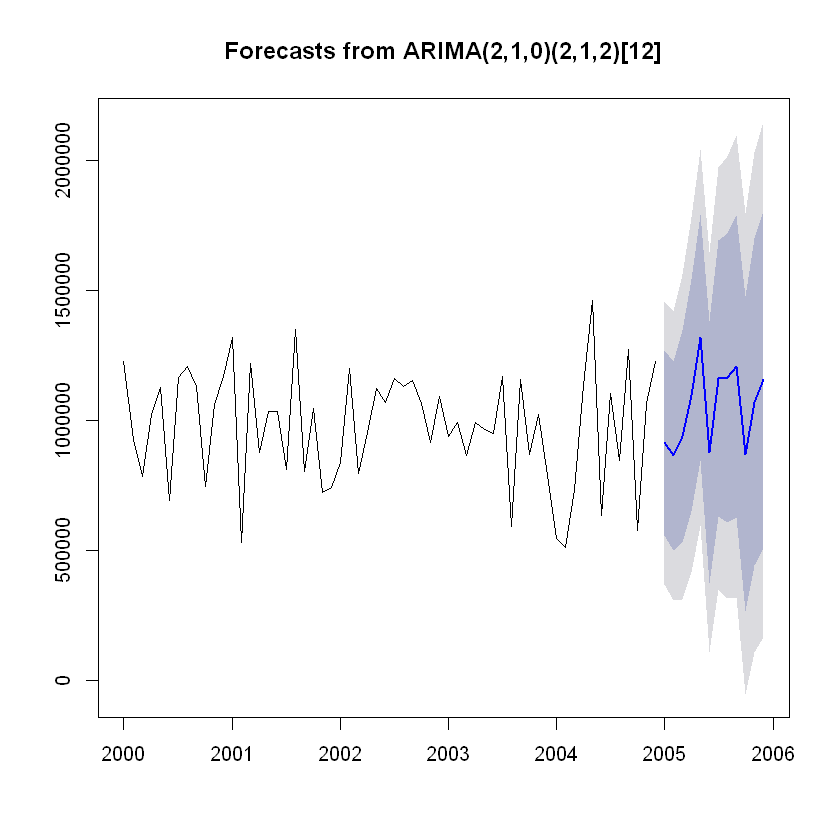

In [27]:
# arima model
shhh(library(astsa))
arima_mod <- arima(ts_data, order = c(2, 1, 0), seasonal = c(2, 1, 2))
arima_for <- forecast(arima_mod, h = 12)
plot(arima_for)

In [28]:
# auto arima model
library(forecast)
autoarima <- auto.arima(ts_data, max.p = 2, max.d = 2, max.q = 2, stepwise = FALSE, approximation = FALSE, trace = TRUE)
arima_forecast <- forecast(autoarima, h = 12)


 ARIMA(0,0,0)            with zero mean     : 1830.374
 ARIMA(0,0,0)            with non-zero mean : 1649.565
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : 1651.777
 ARIMA(0,0,0)(1,0,0)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : 1651.778
 ARIMA(0,0,0)(1,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : 1654.006
 ARIMA(0,0,1)            with zero mean     : 1787.619
 ARIMA(0,0,1)            with non-zero mean : 1650.078
 ARIMA(0,0,1)(0,0,1)[12] with zero mean     : 1762.82
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 1652.345
 ARIMA(0,0,1)(1,0,0)[12] with zero mean     : Inf
 ARIMA(0,0,1)(1,0,0)[12] with non-zero mean : 1652.345
 ARIMA(0,0,1)(1,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,1)(1,0,1)[12] with non-zero mean : 1654.72
 ARIMA(0,0,2)            with zero mean     : Inf
 ARIMA(0,0,2)            with non-zero mean : 1652.271
 ARIMA(0,0,2)(0,0,1)[12] with zero mean  

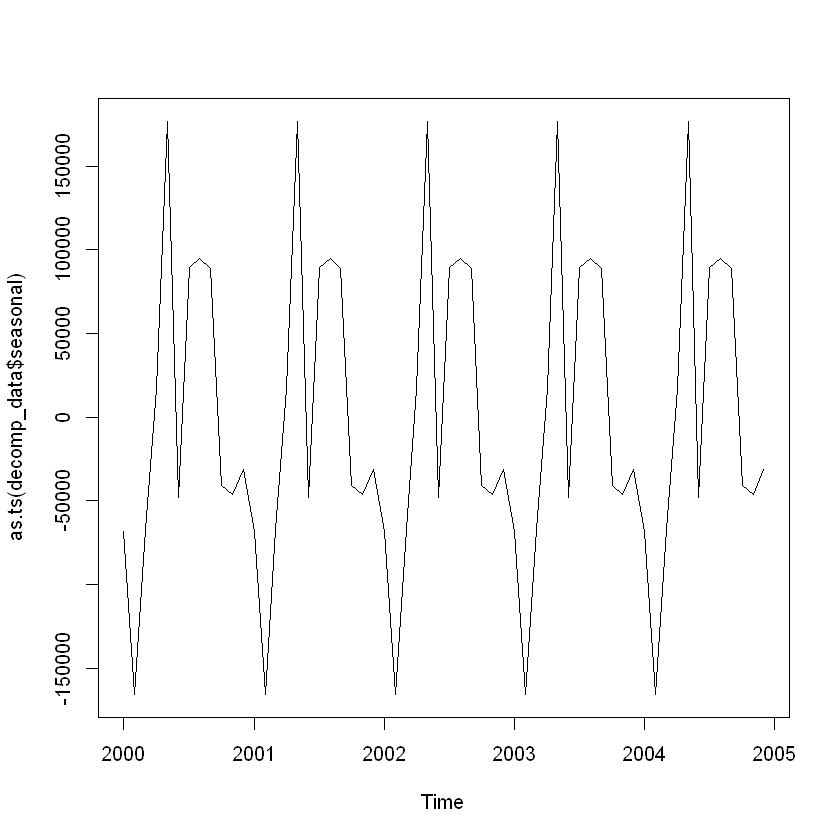

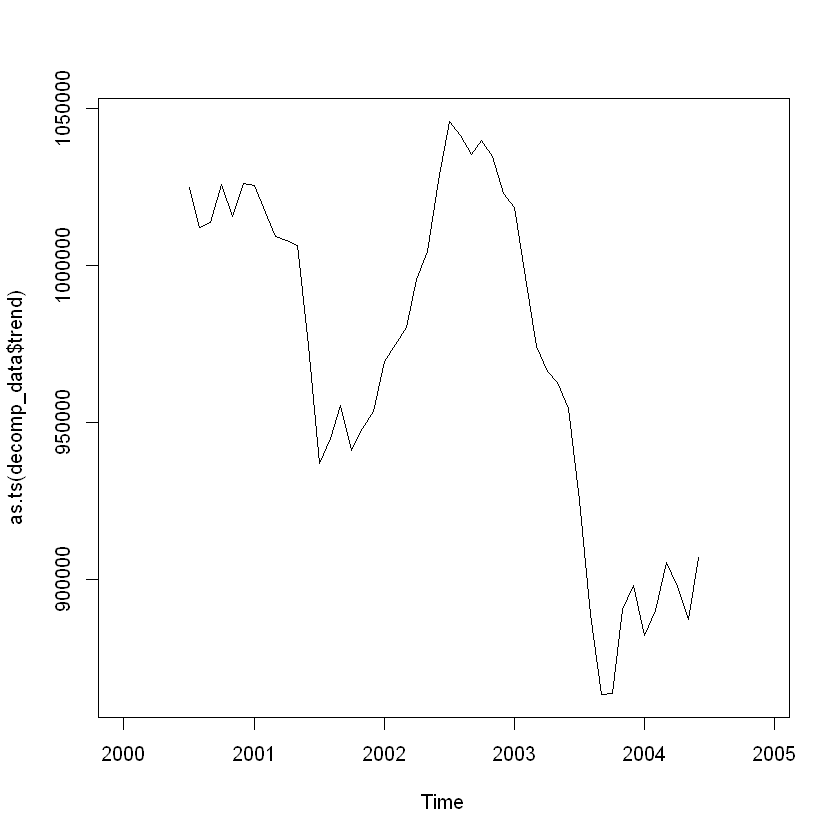

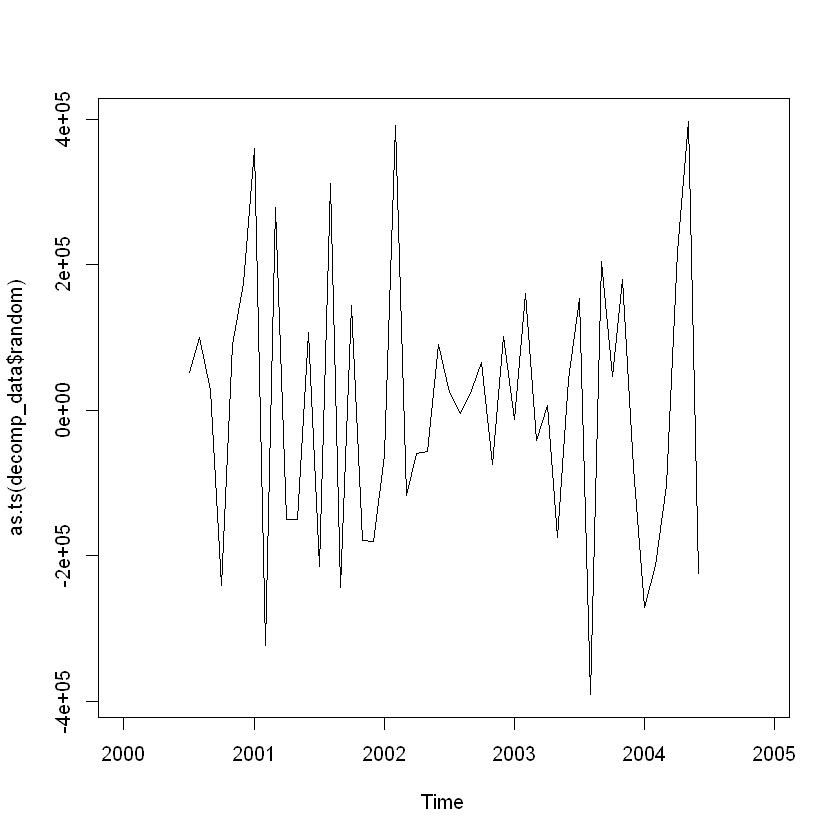

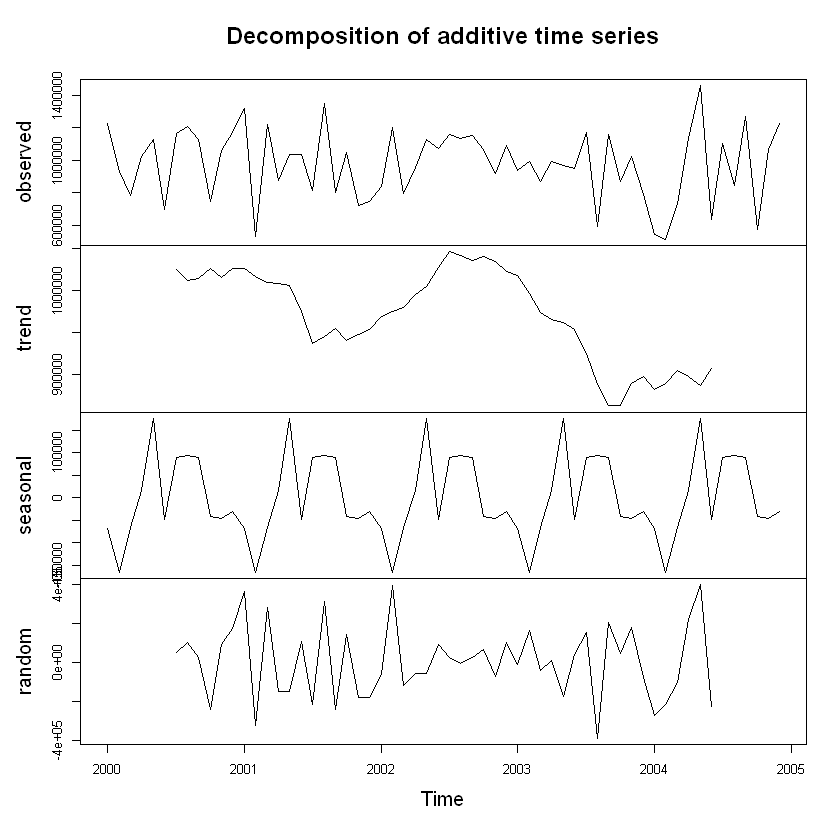

In [29]:
# decompose the data
decomp_data = decompose(ts_data, "additive") # can have multiplicative also decompose(ts_data, "multiplicative")
plot(as.ts(decomp_data$seasonal))
plot(as.ts(decomp_data$trend))
plot(as.ts(decomp_data$random))
plot(decomp_data)

971223.1 831267 880862.1 995282.9 1141751 876961.1 1083943 1028439 1106583 860536.7 954182.9 997310

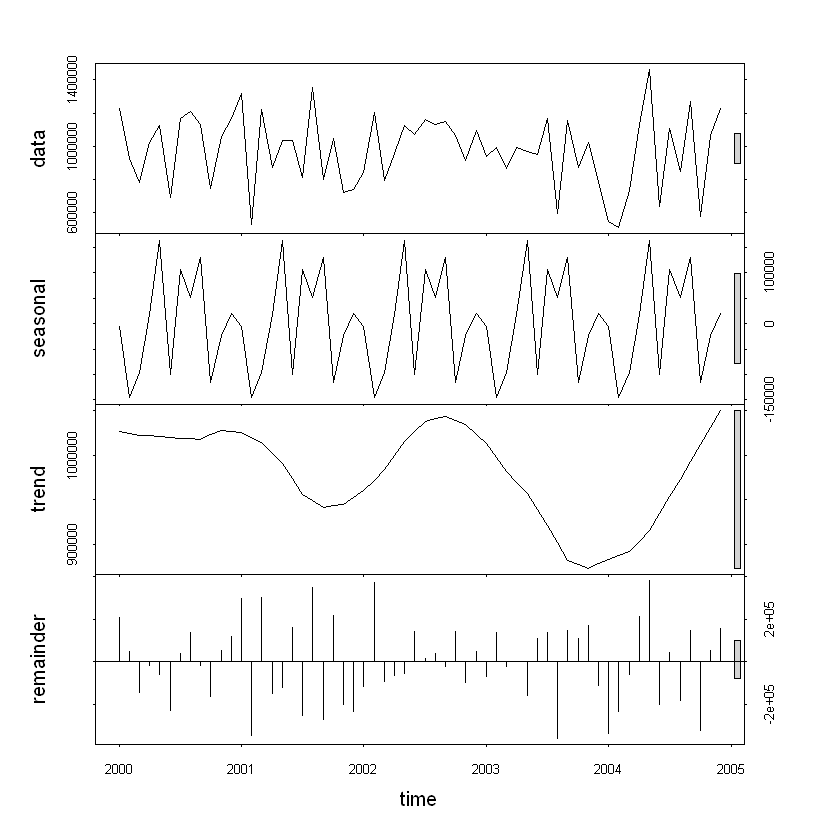

In [30]:
# stl model
stl_data = stl(ts_data, "periodic")
seasonal_stl = stl_data$time.series[, 1]
trend_Stl = stl_data$time.series[, 2]
random_stl = stl_data$time.series[, 3]
plot(stl_data)
stl_forecast = forecast(stl_data, h = 12)
stl_forecast = stl_forecast$mean
cat(stl_forecast)